The DeepDream algorithm used in this project is adapted from the official Keras documentation: https://www.tensorflow.org/tutorials/generative/deepdream

# TASK #1: UNDERSTAND WHAT IS DEEP DREAM ALGORITHM

what happens in the hidden layers of ai?
link: https://www.youtube.com/watch?v=6rVrh5gnpwk

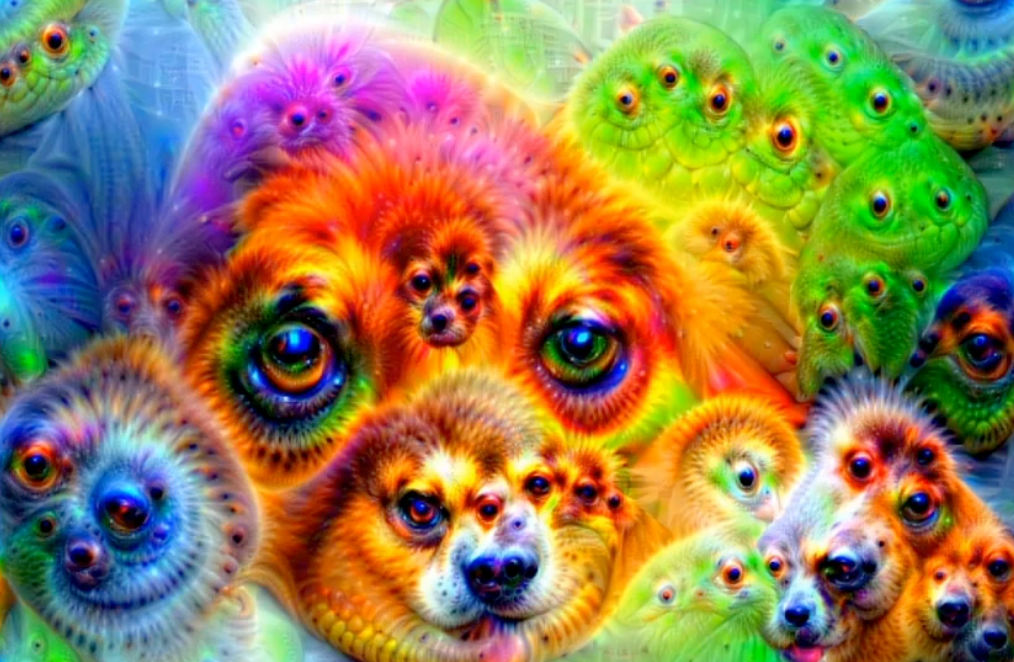

Deep Dream is a fascinating computer vision algorithm developed by Alex Mordvintsev at Google. It generates surreal, dream-like images by enhancing the patterns a neural network detects in an image.
we can think of it as giving the network a kind of “visual hallucination", similar to how a person might see strange shapes after taking a powerful drug. As the image is repeatedly passed through the network, more unexpected features begin to appear. It’s similar to when we were kids, staring at the clouds and trying to find shapes like dogs or horses.
Deep Dream works in the same way: it exaggerates the patterns it has learned during training. So if the model has been trained on animal images, it might start “seeing” animal features like eyes or faces, even in random or unrelated pictures.

# TASK #2: IMPORT MODEL WITH PRE-TRAINED WEIGHTS

In [64]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os
import PIL.Image
import cv2
import random
from PIL import Image # Python Image Library is a library that adds support for opening, manipulating, and saving many different image file formats

In [65]:
tf.__version__

'2.19.0'

In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Loading a Pre-trained Model: InceptionV3 (transfer learning)
We're using InceptionV3, a powerful image classification model trained on ImageNet, a dataset of over 14 million images across thousands of categories.

In [67]:
# Load trained inceptionNet model
base_model = tf.keras.applications.InceptionV3(include_top = False, weights = 'imagenet') #removes the last dense layers (classification head), allowing us to use the model as a feature extractor

When creating art or extracting features (like in Deep Dream), we’re not interested in the classification result. Instead, we focus on the intermediate layer activations, which help us visualize what the model sees

In [68]:
base_model.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_94 (Conv2D)  │ (None, None,      │        864 │ input_layer_1[0]… │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │         96 │ conv2d_94[0][0]   │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_94       │ (None, None,      │          0 │ batch_normalizat… │
│ (Activation)        │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_95 (Conv2D)  │ (None, None,      │      9,216 │ activation_94[0]… │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │         96 │ conv2d_95[0][0]   │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_95       │ (None, None,      │          0 │ batch_normalizat… │
│ (Activation)        │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_96 (Conv2D)  │ (None, None,      │     18,432 │ activation_95[0]… │
│                     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │        192 │ conv2d_96[0][0]   │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_96       │ (None, None,      │          0 │ batch_normalizat… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, None,      │          0 │ activation_96[0]… │
│ (MaxPooling2D)      │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_97 (Conv2D)  │ (None, None,      │      5,120 │ max_pooling2d_4[… │
│                     │ None, 80)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │        240 │ conv2d_97[0][0]   │
│ (BatchNormalizatio… │ None, 80)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_97       │ (None, None,      │          0 │ batch_normalizat… │
│ (Activation)        │ None, 80)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_98 (Conv2D)  │ (None, None,      │    138,240 │ activation_97[0]… │
│                     │ None, 192)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │        576 │ conv2d_98[0][0]   │
│ (BatchNormalizatio… │ None, 192)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_98       │ (None, None,      │          0 │ batch_normalizat

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 21,768,352 (83.04 MB)

 Non-trainable params: 34,432 (134.50 KB)

# TASK #3: GET AN IMAGE AND PRE-PROCESS IT

In [69]:
# Open the first image
# Source: https://www.pxfuel.com/en/free-photo-xxgfs
img_1 = Image.open('/content/drive/MyDrive/Colab Notebooks/mars.jpg')

# Open the second image
# Source: https://commons.wikimedia.org/wiki/File:Georges_Garen_embrasement_tour_Eiffel.jpg
img_2 = Image.open('/content/drive/MyDrive/Colab Notebooks/eiffel.jpg')

# Blend the two images

image = Image.blend(img_1, img_2, 0.5) # alpha --> The interpolation alpha factor. If alpha is 0.0, a copy of the first image is returned.
# If alpha is 1.0, a copy of the second image is returned. 0.5 → blends both images equally.

# Save the blended image
image.save("img_0.jpg")

In [70]:
# Load the image
Sample_Image = tf.keras.preprocessing.image.load_img('img_0.jpg')

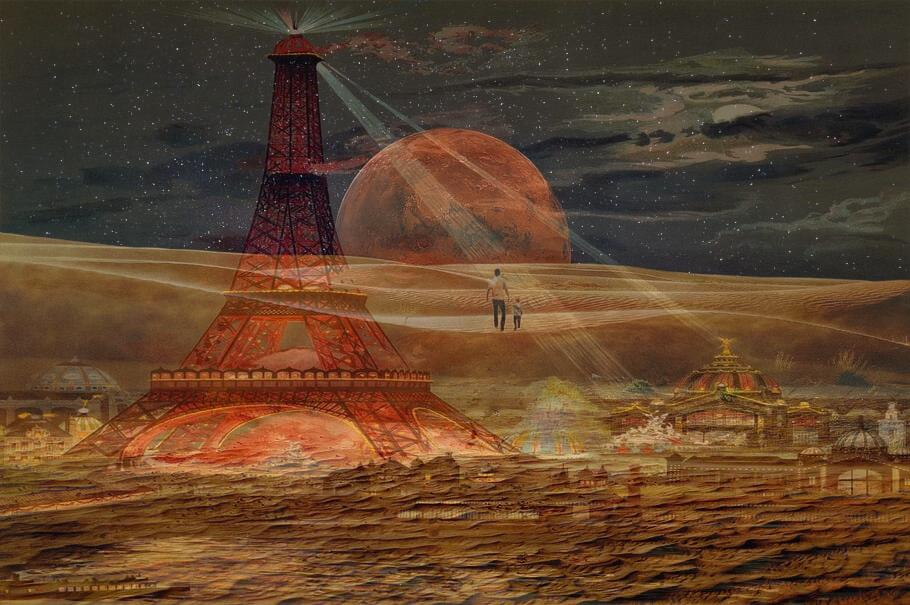

In [71]:
Sample_Image

In [72]:
# Get the shape of the image
np.shape(Sample_Image)

(605, 910, 3)

In [73]:
# Check out the type of the image
type(Sample_Image)

PIL.JpegImagePlugin.JpegImageFile

In [74]:
# Convert to numpy array
Sample_Image = tf.keras.preprocessing.image.img_to_array(Sample_Image)

In [75]:
# Confirm that the image is converted to Numpy array
type(Sample_Image)

numpy.ndarray

In [76]:
# Obtain the max and min values
print('min pixel values = {}, max pixel values = {}'.format(Sample_Image.min(), Sample_Image.max()))

min pixel values = 0.0, max pixel values = 255.0


In [77]:
# Normalize the input image
Sample_Image = np.array(Sample_Image)/255.0
Sample_Image.shape

(605, 910, 3)

In [78]:
# Let's verify normalized images values!
print('min pixel values = {}, max pixel values = {}'.format(Sample_Image.min(), Sample_Image.max()))

min pixel values = 0.0, max pixel values = 1.0


In [79]:
Sample_Image = tf.expand_dims(Sample_Image, axis = 0)

expand_dims() adds a batch dimension → shape becomes (1, height, width, 3). Deep learning models expect input as a batch, not a single image, Even one image must be reshaped to match the model's expected input format

In [80]:
np.shape(Sample_Image)

TensorShape([1, 605, 910, 3])


Perform the opposite of expand dimension

In [81]:
np.squeeze(Sample_Image, axis = 0)

array([[[0.24705882, 0.21960784, 0.15686275],
        [0.24313726, 0.21568628, 0.15294118],
        [0.24313726, 0.21568628, 0.15294118],
        ...,
        [0.21960784, 0.21176471, 0.16470589],
        [0.21960784, 0.21176471, 0.16470589],
        [0.21960784, 0.21176471, 0.16470589]],

       [[0.23921569, 0.21176471, 0.14901961],
        [0.23529412, 0.20784314, 0.14509805],
        [0.23137255, 0.20392157, 0.14117648],
        ...,
        [0.21568628, 0.20784314, 0.16078432],
        [0.21568628, 0.20784314, 0.16078432],
        [0.21960784, 0.21176471, 0.16470589]],

       [[0.22745098, 0.2       , 0.13725491],
        [0.22745098, 0.2       , 0.13725491],
        [0.22352941, 0.19607843, 0.13333334],
        ...,
        [0.20392157, 0.19607843, 0.14901961],
        [0.20784314, 0.2       , 0.15294118],
        [0.21176471, 0.20392157, 0.15686275]],

       ...,

       [[0.54509807, 0.39215687, 0.16078432],
        [0.5568628 , 0.40392157, 0.17254902],
        [0.57254905, 0

In [82]:
Sample_Image.shape

TensorShape([1, 605, 910, 3])

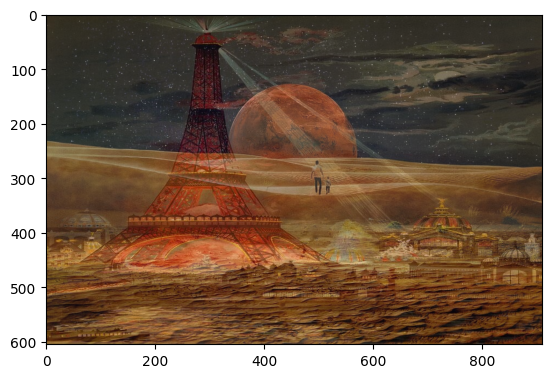

In [83]:
plt.imshow(np.squeeze(image))


# TASK #4: RUN THE PRETRAINED MODEL AND EXPLORE ACTIVATIONS

# NOTES:
- Select a layer and attempt at maximizing the loss which is the activations generated by the layer of interest.
- We can select any layer we choose, early layers generate simple features such as edges and deep layers generate more complex features such as entire face, car or tree.
- Inception network has multiple concatenated layers named 'mixed'

In [84]:
base_model.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_94 (Conv2D)  │ (None, None,      │        864 │ input_layer_1[0]… │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │         96 │ conv2d_94[0][0]   │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_94       │ (None, None,      │          0 │ batch_normalizat… │
│ (Activation)        │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_95 (Conv2D)  │ (None, None,      │      9,216 │ activation_94[0]… │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │         96 │ conv2d_95[0][0]   │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_95       │ (None, None,      │          0 │ batch_normalizat… │
│ (Activation)        │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_96 (Conv2D)  │ (None, None,      │     18,432 │ activation_95[0]… │
│                     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │        192 │ conv2d_96[0][0]   │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_96       │ (None, None,      │          0 │ batch_normalizat… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, None,      │          0 │ activation_96[0]… │
│ (MaxPooling2D)      │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_97 (Conv2D)  │ (None, None,      │      5,120 │ max_pooling2d_4[… │
│                     │ None, 80)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │        240 │ conv2d_97[0][0]   │
│ (BatchNormalizatio… │ None, 80)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_97       │ (None, None,      │          0 │ batch_normalizat… │
│ (Activation)        │ None, 80)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_98 (Conv2D)  │ (None, None,      │    138,240 │ activation_97[0]… │
│                     │ None, 192)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │        576 │ conv2d_98[0][0]   │
│ (BatchNormalizatio… │ None, 192)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_98       │ (None, None,      │          0 │ batch_normalizat

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 21,768,352 (83.04 MB)

 Non-trainable params: 34,432 (134.50 KB)

explore the internal layer outputs (called activations)

In [85]:
# Maximize the activations of these layers

names = ['mixed3', 'mixed5', 'mixed7']

# names = ['mixed3']
layers = [base_model.get_layer(name).output for name in names] # go to these layers and get their outputs
# Create the feature extraction model
deepdream_model = tf.keras.Model(inputs = base_model.input, outputs = layers)

In [86]:
deepdream_model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_94 (Conv2D)  │ (None, None,      │        864 │ input_layer_1[0]… │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │         96 │ conv2d_94[0][0]   │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_94       │ (None, None,      │          0 │ batch_normalizat… │
│ (Activation)        │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_95 (Conv2D)  │ (None, None,      │      9,216 │ activation_94[0]… │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │         96 │ conv2d_95[0][0]   │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_95       │ (None, None,      │          0 │ batch_normalizat… │
│ (Activation)        │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_96 (Conv2D)  │ (None, None,      │     18,432 │ activation_95[0]… │
│                     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │        192 │ conv2d_96[0][0]   │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_96       │ (None, None,      │          0 │ batch_normalizat… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, None,      │          0 │ activation_96[0]… │
│ (MaxPooling2D)      │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_97 (Conv2D)  │ (None, None,      │      5,120 │ max_pooling2d_4[… │
│                     │ None, 80)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │        240 │ conv2d_97[0][0]   │
│ (BatchNormalizatio… │ None, 80)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_97       │ (None, None,      │          0 │ batch_normalizat… │
│ (Activation)        │ None, 80)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_98 (Conv2D)  │ (None, None,      │    138,240 │ activation_97[0]… │
│                     │ None, 192)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │        576 │ conv2d_98[0][0]   │
│ (BatchNormalizatio… │ None, 192)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_98       │ (None, None,      │          0 │ batch_normalizat

 Total params: 8,975,264 (34.24 MB)

 Trainable params: 8,956,448 (34.17 MB)

 Non-trainable params: 18,816 (73.50 KB)

In [87]:
# Let's run the model by feeding in our input image and taking a look at the activations "Neuron outputs"
activations = deepdream_model(Sample_Image)
activations

[<tf.Tensor: shape=(1, 36, 55, 768), dtype=float32, numpy=
 array([[[[0.        , 0.        , 0.        , ..., 0.        ,
           0.28813362, 0.30937272],
          [0.        , 0.33028018, 0.        , ..., 0.        ,
           0.        , 0.        ],
          [0.        , 0.16166002, 0.        , ..., 0.        ,
           0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        , ..., 0.        ,
           0.        , 0.        ],
          [0.        , 0.        , 0.        , ..., 0.37069994,
           0.        , 0.        ],
          [0.03586879, 0.        , 0.        , ..., 0.37069994,
           0.6461059 , 0.        ]],
 
         [[0.75294924, 0.        , 0.        , ..., 0.        ,
           0.16689014, 0.7020424 ],
          [0.        , 0.        , 0.        , ..., 0.        ,
           0.        , 0.3031853 ],
          [0.        , 0.        , 0.        , ..., 0.        ,
           0.        , 0.        ],
          ...,
        

In [88]:
len(activations)

3

In [89]:
deepdream_model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_94 (Conv2D)  │ (None, None,      │        864 │ input_layer_1[0]… │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │         96 │ conv2d_94[0][0]   │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_94       │ (None, None,      │          0 │ batch_normalizat… │
│ (Activation)        │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_95 (Conv2D)  │ (None, None,      │      9,216 │ activation_94[0]… │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │         96 │ conv2d_95[0][0]   │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_95       │ (None, None,      │          0 │ batch_normalizat… │
│ (Activation)        │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_96 (Conv2D)  │ (None, None,      │     18,432 │ activation_95[0]… │
│                     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │        192 │ conv2d_96[0][0]   │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_96       │ (None, None,      │          0 │ batch_normalizat… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, None,      │          0 │ activation_96[0]… │
│ (MaxPooling2D)      │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_97 (Conv2D)  │ (None, None,      │      5,120 │ max_pooling2d_4[… │
│                     │ None, 80)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │        240 │ conv2d_97[0][0]   │
│ (BatchNormalizatio… │ None, 80)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_97       │ (None, None,      │          0 │ batch_normalizat… │
│ (Activation)        │ None, 80)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_98 (Conv2D)  │ (None, None,      │    138,240 │ activation_97[0]… │
│                     │ None, 192)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │        576 │ conv2d_98[0][0]   │
│ (BatchNormalizatio… │ None, 192)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_98       │ (None, None,      │          0 │ batch_normalizat

 Total params: 8,975,264 (34.24 MB)

 Trainable params: 8,956,448 (34.17 MB)

 Non-trainable params: 18,816 (73.50 KB)

# TASK #5: UNDERSTAND HOW TO PERFORM GRADIENT CALCULATION AND TF.GRADIENTTAPE()

Source #1: https://www.topbots.com/advanced-topics-deep-convolutional-neural-networks/

Source #2: https://wccftech.com/nvidia-demo-skynet-gtc-2014-neural-net-based-machine-learning-intelligence/

- tf.GradientTape() is used to record operations for automatic differentiation
- For example, Let's assume we have the following functions y = x^3.
- The gradient at x = 2 can be computed as follows: dy_dx = 3 * x^2 = 3 * 2^2 = 12.


The relevance of this example to DeepDream lies in the need to calculate the gradient of model activations with respect to the input image. By obtaining this derivative, it becomes possible to adjust the input image in a way that enhances the model's internal feature activations. This is done not by changing the model itself, but by iteratively modifying the image to better stimulate specific network responses.

In [91]:
x = tf.constant(2.0)

In [92]:
with tf.GradientTape() as g: # This is essential for recording operations and computing gradients with respect to variables.
  g.watch(x)
  y = x * x * x
dy_dx = g.gradient(y, x) # Will compute to 12

In [93]:
dy_dx

<tf.Tensor: shape=(), dtype=float32, numpy=12.0>

# TASK #6: IMPLEMENT DEEP DREAM ALGORITHM - STEP #1 LOSS CALCULATION

- CREDITS: The DeepDream Code has been adopted from Keras Documentation:
- https://www.tensorflow.org/tutorials/generative/deepdream

In [94]:
# Since the cal_closs function includes expand dimension, let's squeeze the image (reduce_dims)
Sample_Image.shape

TensorShape([1, 605, 910, 3])

In [95]:
Sample_Image = tf.squeeze(Sample_Image, axis = 0)

In [96]:
Sample_Image.shape

TensorShape([605, 910, 3])

The significance of this computation lies in the difference between training-based optimization and DeepDream. In traditional training, the loss is minimized through gradient descent. In DeepDream, the loss is instead maximized using gradient ascent. The objective is to enhance the model's internal representations (i.e., activations), causing the input image to evolve in a direction that intensifies those activations.

In [97]:
def calc_loss(image, model):
# Function used for loss calculations
# It works by feedforwarding the input image through the network and generate activations
# Then obtain the average and sum of those outputs

  img_batch = tf.expand_dims(image, axis=0) # Convert into batch format
  layer_activations = model(img_batch) # Run the model
  print('ACTIVATION VALUES (LAYER OUTPUT) =\n', layer_activations)
  # print('ACTIVATION SHAPE =\n', np.shape(layer_activations))

  losses = [] # accumulator to hold all the losses
  for act in layer_activations:
    loss = tf.math.reduce_mean(act) # calculate mean of each activation
    losses.append(loss)

  print('LOSSES (FROM MULTIPLE ACTIVATION LAYERS) = ', losses)
  print('LOSSES SHAPE (FROM MULTIPLE ACTIVATION LAYERS) = ', np.shape(losses))
  print('SUM OF ALL LOSSES (FROM ALL SELECTED LAYERS)= ', tf.reduce_sum(losses))

  return  tf.reduce_sum(losses) # Calculate sum

In [98]:
loss = calc_loss(tf.Variable(Sample_Image), deepdream_model)

ACTIVATION VALUES (LAYER OUTPUT) =
 [<tf.Tensor: shape=(1, 36, 55, 768), dtype=float32, numpy=
array([[[[0.        , 0.        , 0.        , ..., 0.        ,
          0.28813362, 0.30937272],
         [0.        , 0.33028018, 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.16166002, 0.        , ..., 0.        ,
          0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.37069994,
          0.        , 0.        ],
         [0.03586879, 0.        , 0.        , ..., 0.37069994,
          0.6461059 , 0.        ]],

        [[0.75294924, 0.        , 0.        , ..., 0.        ,
          0.16689014, 0.7020424 ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.3031853 ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
       

In [99]:
loss # Sum up the losses from both activations

<tf.Tensor: shape=(), dtype=float32, numpy=0.5578055381774902>

# TASK #7: IMPLEMENT DEEP DREAM ALGORITHM - STEP #2 (CALCULATE THE GRADIENT)

- In this step, we will rely on the loss that has been calculated in the previous step and calculate the gradient with respect to the given input image and then add it to the input original image.
- Doing so iteratively will result in feeding images that continiously and increasingly excite the neurons and generate more dreamy like images!


In [100]:
# When you annotate a function with tf.function, the function can be called like any other python defined function.
# The benefit is that it will be compiled into a graph so it will be much faster and could be executed over TPU/GPU

@tf.function
def deepdream(model, image, step_size):
    with tf.GradientTape() as tape:
      # This needs gradients relative to `img`
      # `GradientTape` only watches `tf.Variable`s by default
      tape.watch(image)
      loss = calc_loss(image, model) # call the function that calculate the loss

    # Calculate the gradient of the loss with respect to the pixels of the input image.
    # The syntax is as follows: dy_dx = g.gradient(y, x)
    gradients = tape.gradient(loss, image)

    print('GRADIENTS =\n', gradients)
    print('GRADIENTS SHAPE =\n', np.shape(gradients))

    # tf.math.reduce_std computes the standard deviation of elements across dimensions of a tensor
    gradients /= tf.math.reduce_std(gradients)

    # In gradient ascent, the "loss" is maximized so that the input image increasingly "excites" the layers.
    # You can update the image by directly adding the gradients (because they're the same shape!)
    image = image + gradients * step_size
    image = tf.clip_by_value(image, -1, 1)

    return loss, image

In [101]:
def run_deep_dream_simple(model, image, steps = 100, step_size = 0.01):
  # Convert from uint8 to the range expected by the model.
  image = tf.keras.applications.inception_v3.preprocess_input(image)

  for step in range(steps):
    loss, image = deepdream(model, image, step_size)

    if step % 100 == 0:
      plt.figure(figsize=(12,12))
      plt.imshow(deprocess(image))
      plt.show()
      print ("Step {}, loss {}".format(step, loss))

  # clear_output(wait=True)
  plt.figure(figsize=(12,12))
  plt.imshow(deprocess(image))
  plt.show()

  return deprocess(image)

In [102]:
def deprocess(image):
  image = 255*(image + 1.0)/2.0
  return tf.cast(image, tf.uint8)


In [103]:
Sample_Image.shape

TensorShape([605, 910, 3])

In [104]:
# Let's Load the image again and convert it to Numpy array
Sample_Image = np.array(tf.keras.preprocessing.image.load_img('img_0.jpg'))
dream_img = run_deep_dream_simple(model = deepdream_model, image = Sample_Image, steps = 4000, step_size = 0.001)


ACTIVATION VALUES (LAYER OUTPUT) =
 [<tf.Tensor 'functional_7_1/mixed3_1/concat:0' shape=(1, 36, 55, 768) dtype=float32>, <tf.Tensor 'functional_7_1/mixed5_1/concat:0' shape=(1, 36, 55, 768) dtype=float32>, <tf.Tensor 'functional_7_1/mixed7_1/concat:0' shape=(1, 36, 55, 768) dtype=float32>]
LOSSES (FROM MULTIPLE ACTIVATION LAYERS) =  [<tf.Tensor 'Mean:0' shape=() dtype=float32>, <tf.Tensor 'Mean_1:0' shape=() dtype=float32>, <tf.Tensor 'Mean_2:0' shape=() dtype=float32>]


NotImplementedError: in user code:

    File "/tmp/ipython-input-1743234281.py", line 10, in deepdream  *
        loss = calc_loss(image, model) # call the function that calculate the loss
    File "/tmp/ipython-input-3014354395.py", line 17, in calc_loss  *
        print('LOSSES SHAPE (FROM MULTIPLE ACTIVATION LAYERS) = ', np.shape(losses))
    File "/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py", line 2102, in shape  **
        result = asarray(a).shape

    NotImplementedError: Cannot convert a symbolic tf.Tensor (Mean:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported.


# TASK #8: (VIDEO) APPLY DEEPDREAM TO GENERATE A SERIES OF IMAGES

In [105]:
image = tf.keras.preprocessing.image.load_img("img_0.jpg")

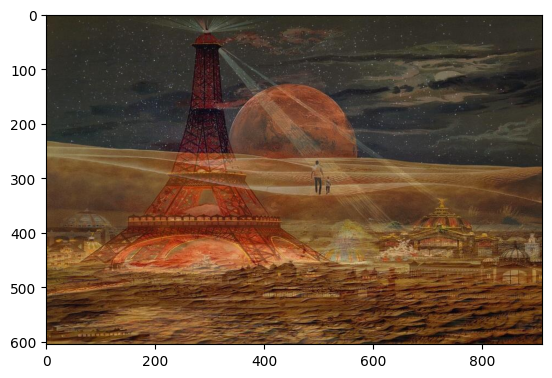

In [106]:
plt.imshow(image)

In [107]:
# Name of the folder
dream_name = 'mars_eiffel'

In [108]:
# Blended image dimension

x_size = 910 # larger the image longer is going to take to fetch the frames
y_size = 605

In [109]:
# Define Counters
created_count = 0
max_count = 50

In [110]:
# This helper function loads an image and returns it as a numpy array of floating points

def load_image(filename):
    image = PIL.Image.open(filename)
    return np.float32(image)

In [112]:
for i in range(0, 50):
    # Make sure to create a new folder entitled 'mars_eiffel' and place img_0 in it
    # Get into the dream directory and look for the number of images and then figure out what is the latest image. Hence this
    # image we are going to start with and let it dream on and on

    if os.path.isfile('/content/drive/MyDrive/Colab Notebooks/{}/img_{}.jpg'.format(dream_name, i+1)):
        print("{} present already, continue fetching the frames...".format(i+1))

    else:
        # Call the load image funtion
        img_result = load_image(r'/content/drive/MyDrive/Colab Notebooks/{}/img_{}.jpg'.format(dream_name, i))


        # Zoom the image
        x_zoom = 2 # this indicates how quick the zoom is
        y_zoom = 1

        # Chop off the edges of the image and resize the image back to the original shape. This gives the visual changes of a zoom
        img_result = img_result[0+x_zoom : y_size-y_zoom, 0+y_zoom : x_size-x_zoom]
        img_result = cv2.resize(img_result, (x_size, y_size))

        # Adjust the RGB value of the image
        img_result[:, :, 0] += 2  # red
        img_result[:, :, 1] += 2  # green
        img_result[:, :, 2] += 2  # blue

        # Deep dream model
        img_result = run_deep_dream_simple(model = deepdream_model, image = img_result, steps = 500, step_size = 0.001)

        # Clip the image, convert the datatype of the array, and then convert to an actual image.
        img_result = np.clip(img_result, 0.0, 255.0)
        img_result = img_result.astype(np.uint8)
        result = PIL.Image.fromarray(img_result, mode='RGB')

        # Save all the frames in the dream location
        result.save(r'/content/drive/MyDrive/Colab Notebooks/img_{}.jpg'.format(dream_name, i+1))

        created_count += 1
        if created_count > max_count:
            break

1 present already, continue fetching the frames...
2 present already, continue fetching the frames...
3 present already, continue fetching the frames...
4 present already, continue fetching the frames...
5 present already, continue fetching the frames...
6 present already, continue fetching the frames...
7 present already, continue fetching the frames...
8 present already, continue fetching the frames...
9 present already, continue fetching the frames...
10 present already, continue fetching the frames...
11 present already, continue fetching the frames...
12 present already, continue fetching the frames...
13 present already, continue fetching the frames...
14 present already, continue fetching the frames...
15 present already, continue fetching the frames...
16 present already, continue fetching the frames...
17 present already, continue fetching the frames...
18 present already, continue fetching the frames...
19 present already, continue fetching the frames...
20 present already, c

# TASK #9: (VIDEO) CREATE A VIDEO FROM ALL THE FRAMES

In [114]:
from google.colab import files
uploaded = files.upload()

Saving mars_eiffel 2.zip to mars_eiffel 2.zip


In [115]:
# Unzip the folder

from zipfile import ZipFile
file_name = "mars_eiffel 2.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [116]:
# Path of all the frames

dream_path = 'mars_eiffel'

In [117]:
# Define the codec and create VideoWriter object
# Download FFmeg

fourcc = cv2.VideoWriter_fourcc(*'XVID') # FourCC is a 4-byte code used to specify the video codec

out = cv2.VideoWriter('deepdreamvideo.avi', fourcc , 5.0, (910, 605)) # Specify the fourCC, frames per second (fps),
                                                                            # and frame size
# The frames per second value is depends on few important things
# 1. The number of frames we have created. Less number of frames brings small fps
# 2. The larger the image the bigger the fps value. For example, 1080 pixel image can bring 60 fps

In [118]:
for i in range(9999999999999):

    # Get into the dream directory and looks for the number of images and then figure out what is the latest image. Hence with
    # this image we are going to start with and let it dream on and on
    if os.path.isfile('mars_eiffel/img_{}.jpg'.format(i+1)):
        pass
    # Figure out how long the dream is
    else:
        dream_length = i
        break

In [119]:
dream_length

200

In [120]:
for i in range(dream_length):

    # Build the frames of cv2.VideoWriter
    img_path = os.path.join(dream_path,'img_{}.jpg'.format(i)) # join the dream path

    print(img_path) # print the image path

    frame = cv2.imread(img_path)
    out.write(frame)

out.release()

mars_eiffel/img_0.jpg
mars_eiffel/img_1.jpg
mars_eiffel/img_2.jpg
mars_eiffel/img_3.jpg
mars_eiffel/img_4.jpg
mars_eiffel/img_5.jpg
mars_eiffel/img_6.jpg
mars_eiffel/img_7.jpg
mars_eiffel/img_8.jpg
mars_eiffel/img_9.jpg
mars_eiffel/img_10.jpg
mars_eiffel/img_11.jpg
mars_eiffel/img_12.jpg
mars_eiffel/img_13.jpg
mars_eiffel/img_14.jpg
mars_eiffel/img_15.jpg
mars_eiffel/img_16.jpg
mars_eiffel/img_17.jpg
mars_eiffel/img_18.jpg
mars_eiffel/img_19.jpg
mars_eiffel/img_20.jpg
mars_eiffel/img_21.jpg
mars_eiffel/img_22.jpg
mars_eiffel/img_23.jpg
mars_eiffel/img_24.jpg
mars_eiffel/img_25.jpg
mars_eiffel/img_26.jpg
mars_eiffel/img_27.jpg
mars_eiffel/img_28.jpg
mars_eiffel/img_29.jpg
mars_eiffel/img_30.jpg
mars_eiffel/img_31.jpg
mars_eiffel/img_32.jpg
mars_eiffel/img_33.jpg
mars_eiffel/img_34.jpg
mars_eiffel/img_35.jpg
mars_eiffel/img_36.jpg
mars_eiffel/img_37.jpg
mars_eiffel/img_38.jpg
mars_eiffel/img_39.jpg
mars_eiffel/img_40.jpg
mars_eiffel/img_41.jpg
mars_eiffel/img_42.jpg
mars_eiffel/img_43.jp